<a href="https://colab.research.google.com/github/kealmahe2003/Codelabs---Integrador2/blob/main/Reconocimiento_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mtcnn opencv-python-headless matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.9 MB/s eta 0:00:00


Detected: 2 rostro(s) • tiempo: 805.7 ms
0.9931676983833313 [400, 326, 115, 137] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.989132821559906 [291, 358, 101, 150] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])


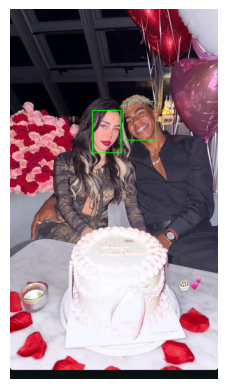

Con thr=0.9 quedan 2 rostros


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from time import time

# Carga imagen (sube archivos en Colab o usa una URL y descárgala)
img1 = cv2.imread('Nicki y Lamine.jpg')  # reemplaza por tu archivo
img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

detector = MTCNN()   # puedes ajustar min_face_size
t0 = time()
res = detector.detect_faces(img_rgb1)
t1 = time()

print(f"Detected: {len(res)} rostro(s) • tiempo: {(t1 - t0)*1000:.1f} ms")
for r in res:
    print(r['confidence'], r['box'], r['keypoints'].keys())

vis1 = img_rgb1.copy()
for r in res:
    x, y, w, h = r['box']
    cv2.rectangle(vis1, (x,y), (x+w, y+h), (0,255,0), 2)
    for name, (px,py) in r['keypoints'].items():
        cv2.circle(vis1, (px,py), 2, (255,0,0), -1)
plt.imshow(vis1)
plt.axis('off')
plt.show()



Detected: 1 rostro(s) • tiempo: 582.8 ms
0.9740161299705505 [244, 96, 182, 245] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])


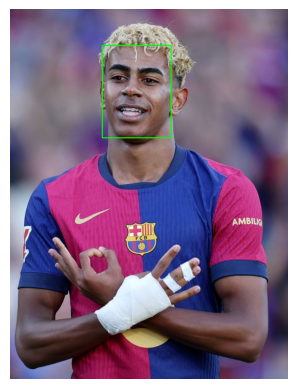

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from time import time

# Carga imagen (sube archivos en Colab o usa una URL y descárgala)
img2 = cv2.imread('Lamine.jpg')  # reemplaza por tu archivo
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

detector = MTCNN()   # puedes ajustar min_face_size
t0 = time()
res = detector.detect_faces(img_rgb2)
t1 = time()

print(f"Detected: {len(res)} rostro(s) • tiempo: {(t1 - t0)*1000:.1f} ms")
for r in res:
    print(r['confidence'], r['box'], r['keypoints'].keys())

vis2 = img_rgb2.copy()
for r in res:
    x, y, w, h = r['box']
    cv2.rectangle(vis2, (x,y), (x+w, y+h), (0,255,0), 2)
    for name, (px,py) in r['keypoints'].items():
        cv2.circle(vis2, (px,py), 2, (255,0,0), -1)
plt.imshow(vis2)
plt.axis('off')
plt.show()

In [14]:
detector = MTCNN()  # su NMS interno filtra solapes
# Prueba filtrado por confianza mínima
thr = 0.90
filtrados = [r for r in res if r['confidence'] >= thr]
print(f"Con thr={thr} quedan {len(filtrados)} rostros")

Con thr=0.9 quedan 1 rostros
